In [1]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
tickers = ["AAPL", "IBM", "CSCO", "AMZN"]
portFolio = pd.DataFrame()
for t in tickers:
    portFolio[t] = wb.DataReader(t, data_source="yahoo", start = "2012-1-1")["Adj Close"]

In [3]:
portFolio.head()

,AAPL,IBM,CSCO,AMZN
Date,,,,
2012-01-03,50.994907,139.934006,14.633397,179.029999
2012-01-04,51.268970,139.363144,14.916168,177.509995
2012-01-05,51.838169,138.702209,14.861184,177.610001
2012-01-06,52.380054,137.109772,14.806202,182.610001
2012-01-09,52.296970,136.396225,14.900459,178.559998


In [4]:
mean_Daily_return = portFolio.pct_change(1).mean()

In [5]:
mean_Daily_return

AAPL    0.000981
IBM     0.000045
CSCO    0.000597
AMZN    0.001327
dtype: float64

In [6]:
port_Corr = portFolio.pct_change(1).corr()

In [7]:
port_Corr

,AAPL,IBM,CSCO,AMZN
AAPL,1.000000,0.331882,0.396300,0.357684
IBM,0.331882,1.000000,0.449716,0.307259
CSCO,0.396300,0.449716,1.000000,0.366809
AMZN,0.357684,0.307259,0.366809,1.000000


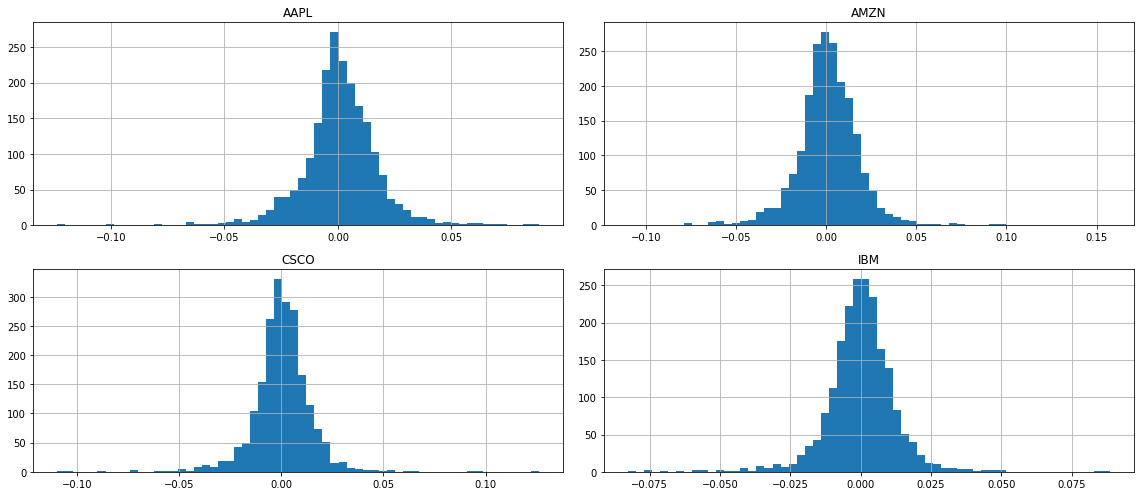

In [8]:
portFolio.pct_change(1).hist(bins = 60, figsize = (16,7))
plt.tight_layout()

In [9]:
port_Covariance = portFolio.pct_change(1).cov() * 252

In [10]:
port_Covariance

,AAPL,IBM,CSCO,AMZN
AAPL,0.066726,0.016851,0.023394,0.027439
IBM,0.016851,0.038634,0.020200,0.017935
CSCO,0.023394,0.020200,0.052222,0.024894
AMZN,0.027439,0.017935,0.024894,0.088194


#### LEts generate random allocations for the portfolio

In [11]:
print(portFolio.columns)

Index(['AAPL', 'IBM', 'CSCO', 'AMZN'], dtype='object')


In [12]:
np.random.seed(101)

number_of_port = 2000
all_Weights = np.zeros((number_of_port, len(portFolio.columns)))
ret_array = np.zeros(number_of_port)
vol_array = np.zeros(number_of_port)
sharp_array = np.zeros(number_of_port)

for index in range(number_of_port):
    
    random_weights = np.random.random(4)
    random_weights = random_weights/np.sum(random_weights)
    
    all_Weights[index,:] =random_weights
    ## Expected Returns
    ret_array[index] = np.sum((portFolio.pct_change(1).mean() * random_weights) * 252)

    vol_array[index] = np.sqrt(np.dot(random_weights.T, np.dot(port_Covariance, random_weights)))

    sharp_array[index] = ret_array[index]/ vol_array[index]

In [13]:
sharp_array.max()

1.2721347231805382

In [14]:
sharp_array.argmax()

648

In [15]:
all_Weights[139]

array([0.02135807, 0.01935326, 0.11272843, 0.84656025])

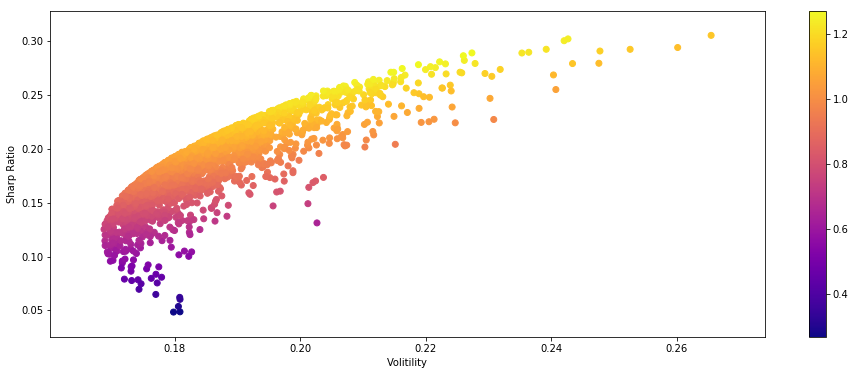

In [16]:
plt.figure(figsize=(16,6))
plt.scatter(vol_array,ret_array, c = sharp_array, cmap="plasma")
plt.xlabel("Volitility")
plt.ylabel("Sharp Ratio")
plt.colorbar()

## The Random weights above does not add up to 100% so we need to fix this. Lets rebalance the weights